# ReAct with Custom tool

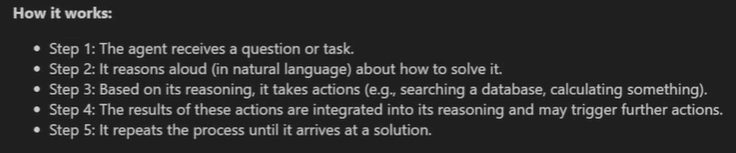

In [1]:
from langchain import hub
from langchain.agents import AgentExecutor, create_react_agent
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_community.chat_models import ChatOllama

In [2]:
local_llm = "llama3.1"

In [3]:
llm = ChatOllama(model=local_llm)

In [4]:
import os

In [5]:
os.environ['TAVILY_API_KEY'] = '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'

In [8]:
employee_data = {
    "John Doe": {"id": 101, "salary": 5000},
    "Jane Smith": {"id": 102, "salary": 6000},
    "Alice Johnson": {"id": 103, "salary": 7000},
    "Bob Brown": {"id": 104, "salary": 5500},
}

In [9]:
def get_employee_id(name: str) -> int:
    """Return the employee ID based on the employee name."""
    employee = employee_data.get(name)
    if employee:
        return employee["id"]
    else:
        return "Employee not found"

In [10]:
def get_employee_salary(emp_id: int) -> int:
    """Return the employee salary based on the employee ID."""
    for employee in employee_data.values():
        if employee["id"] == emp_id:
            return employee["salary"]
    return "Employee ID not found"

In [11]:
from langchain.tools import Tool


In [12]:
employee_id_tool = Tool(
    name="Get Employee ID",
    func=get_employee_id,
    description="Gets the employee ID based on the employee's name."
)


In [13]:
employee_salary_tool = Tool(
    name="Get Employee Salary",
    func=get_employee_salary,
    description="Gets the employee's salary based on the employee's ID."
)

In [14]:
tavily_search_tool = TavilySearchResults()

In [15]:
tools = [
    employee_id_tool,
    employee_salary_tool,
    tavily_search_tool
]

In [18]:
prompt = hub.pull("hwchase17/react")

c:\Users\musta\AppData\Local\Programs\Python\Python311\Lib\site-packages\langchain\hub.py:80: DeprecationWarning: The `langchainhub sdk` is deprecated.
Please use the `langsmith sdk` instead:
  pip install langsmith
Use the `pull_prompt` method.
  resp: str = client.pull(owner_repo_commit)
c:\Users\musta\AppData\Local\Programs\Python\Python311\Lib\site-packages\langchainhub\client.py:326: DeprecationWarning: The `langchainhub sdk` is deprecated.
Please use the `langsmith sdk` instead:
  pip install langsmith
Use the `pull_prompt` method.
  res_dict = self.pull_repo(owner_repo_commit)


In [19]:
agent = create_react_agent(llm, tools, prompt)

In [20]:
agent_executor = AgentExecutor.from_agent_and_tools(agent=agent, tools=tools)


In [ ]:
input_text = "Find the employee ID for Jane Smith and get their salary."
result = agent_executor.invoke({"input": input_text})

In [ ]:
input_text = "who is the king of bollywood?"
result = agent_executor.invoke({"input": input_text})